In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
#Sales data for 16 years. Year end frequency i.e., 1782 had 112.0 sales 
data = [112, 156, 121, 172, 187, 153, 152, 212, 135, 121, 263, 213, 161, 212, 223, 260]
index = pd.date_range(start = '1782', end = '1798', freq = 'A')
sales = pd.Series(data, index)
sales = sales.astype('double')
sales

1782-12-31    112.0
1783-12-31    156.0
1784-12-31    121.0
1785-12-31    172.0
1786-12-31    187.0
1787-12-31    153.0
1788-12-31    152.0
1789-12-31    212.0
1790-12-31    135.0
1791-12-31    121.0
1792-12-31    263.0
1793-12-31    213.0
1794-12-31    161.0
1795-12-31    212.0
1796-12-31    223.0
1797-12-31    260.0
Freq: A-DEC, dtype: float64

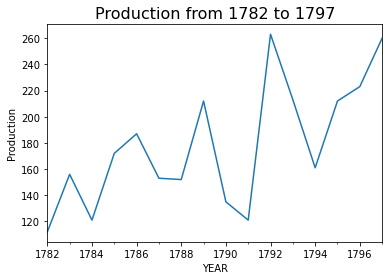

In [ ]:
ax = sales.plot()
ax.set_xlabel("YEAR")
ax.set_ylabel("Production")
ax.set_title("Production from 1782 to 1797", fontsize = 16)
plt.show()

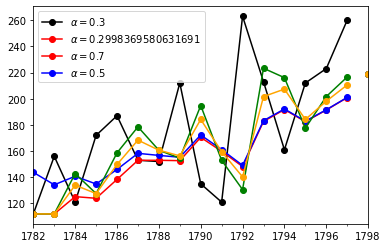

In [ ]:
#Simple Exponential Smoothing
#Fit1 = alpha value is 0.3
#Fit2 = optimized alpha
#Fit3 = alpha value is 0.7
#Fit4 = alpha value is 0.5

fit1 = SimpleExpSmoothing(sales).fit(smoothing_level = 0.3, optimized=False)
fcast1 = fit1.forecast().rename(r'$\alpha = 0.3$')   
#for forecasting 10 values ahead in future write forecast(10)

fit2 = SimpleExpSmoothing(sales).fit()
fcast2 = fit2.forecast().rename(r'$\alpha = %s$'%fit2.model.params['smoothing_level'])

fit3 = SimpleExpSmoothing(sales).fit(smoothing_level = 0.7, optimized=False)
fcast3 = fit1.forecast().rename(r'$\alpha = 0.7$')

fit4 = SimpleExpSmoothing(sales).fit(smoothing_level = 0.5, optimized=False)
fcast4 = fit1.forecast().rename(r'$\alpha = 0.5$')

ax = sales.plot(marker = 'o', color = 'black')
fcast1.plot(marker = 'o', color = 'red', legend = True, ax = ax)
fit1.fittedvalues.plot(marker = 'o', color = 'red', ax = ax)
fcast2.plot(marker = 'o', color = 'blue', legend = True, ax = ax)
fit2.fittedvalues.plot(marker = 'o', color = 'blue', ax = ax)
fcast3.plot(marker = 'o', color = 'green', legend = True, ax = ax)
fit3.fittedvalues.plot(marker = 'o', color = 'green', ax = ax)
fcast4.plot(marker = 'o', color = 'orange', legend = True, ax = ax)
fit4.fittedvalues.plot(marker = 'o', color = 'orange', ax = ax)


In [ ]:
#Holt's Method(Double Exponential Smoothing)
#fit1 => we will take alpha = 0.8, beta = 0.2 

In [ ]:
fit1 = Holt(sales).fit(smoothing_level = 0.8, smoothing_slope = 0.2, optimized = False)
fcast1 = fit1.forecast(3).rename(r'$\alpha = 0.8$, $\beta = 0.2$')

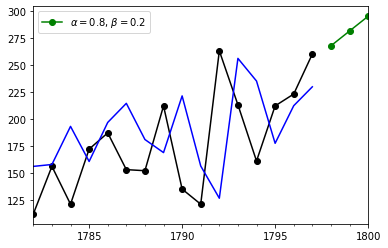

In [ ]:
ax = sales.plot(color = "black", marker = "o")
fit1.fittedvalues.plot(ax = ax, color = "blue")
fcast1.plot(ax = ax, color = "green", marker = "o", legend = True)

#### Automatic Optimization for alpha and beta values

In [ ]:
data = [101, 112, 121, 134, 114, 146, 151, 164, 138, 187, 197, 148]
index = pd.date_range(start = '1890', end = '1902', freq = 'A')
sales = pd.Series(data, index)
sales = sales.astype('double')
sales

1890-12-31    101.0
1891-12-31    112.0
1892-12-31    121.0
1893-12-31    134.0
1894-12-31    114.0
1895-12-31    146.0
1896-12-31    151.0
1897-12-31    164.0
1898-12-31    138.0
1899-12-31    187.0
1900-12-31    197.0
1901-12-31    148.0
Freq: A-DEC, dtype: float64

In [ ]:
fit1 = Holt(sales).fit()
fcast1 = fit1.forecast(3).rename(r'$\alpha = %s$ , $\beta = %s$'%(fit1.model.params['smoothing_level'], fit1.model.params['smoothing_slope']))

C:\Users\Sachin Tripathi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


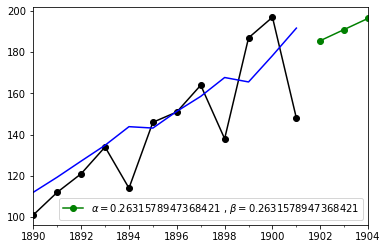

In [ ]:
ax = sales.plot(color = "black", marker = "o")
fit1.fittedvalues.plot(ax = ax, color = "blue")
fcast1.plot(ax = ax, color = "green", marker = "o", legend = True)